Now that we have generated the datasets for every book. We must proceed to input to the learning model

In [335]:
from fastai.text import * 
from sklearn.model_selection import train_test_split

In [336]:
path = 'processed/'
gospels = ['Mateo' , 'Marcos', 'Lucas', 'Juan']

df = []

for g in gospels:
    df_temp = pd.read_csv(path+g+'.csv')
    df_temp = df_temp.loc[:, ~df_temp.columns.str.contains('^Unnamed')]
    df.append(df_temp)

df = pd.concat(df)
df.columns= ['text', 'label']
df = df[['label', 'text']]
df

,label,text
0,1,"está: Al Señor tu Dios adorarás, y a él sólo s..."
1,1,"hasta la deportación a Babilonia, catorce; y d..."
2,1,"delante de ellos, hasta que llegando, se detuv..."
3,1,¿Hasta cuándo he de estar con vosotros? ¿Hasta...
4,1,"que me confiese delante de los hombres, yo tam..."
...,...,...
165,4,"por causa de mi nombre, porque no conocen al q..."
166,4,judíos respondieron y le dijeron: ¿Qué señal n...
167,4,del cielo y da vida al mundo. Le dijeron: Seño...
168,4,"he dicho estas cosas, tristeza ha llenado vues..."


In [337]:
df.groupby('label').count()

,text
label,
1,170
2,170
3,170
4,170


In [338]:
train, val = train_test_split(df)

In [339]:
# Language model data
data_lm = TextLMDataBunch.from_df('.', train_df= train, valid_df=val)

In [340]:
# Classifier model data
data_clas = TextClasDataBunch.from_df('.', train_df= train,
                                      valid_df=val, 
                                      vocab=data_lm.train_ds.vocab,
                                      bs=16)

In [341]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5, opt_func=optim.RMSprop)
learn.crit = F.cross_entropy
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,6.503870,5.262466,0.182589,01:07
1,5.530221,4.301196,0.232254,01:08
2,5.024015,4.213665,0.239732,01:08


In [342]:
learn.save_encoder('ft_enc')

In [343]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,  opt_func=optim.RMSprop )
learn.load_encoder('ft_enc')
learn.crit = F.cross_entropy

In [344]:
data_clas.show_batch()

text,target
"xxbos de la deportación a xxmaj babilonia , xxmaj xxunk engendró a xxmaj salatiel , y xxmaj salatiel a xxmaj zorobabel . xxmaj zorobabel engendró a xxmaj abiud , xxmaj abiud a xxmaj eliaquim , y xxmaj eliaquim a xxmaj azor . xxmaj azor engendró a xxmaj sadoc , xxmaj sadoc a xxmaj aquim , y xxmaj aquim a xxmaj eliud . xxmaj eliud engendró a xxmaj eleazar , xxmaj",1
"xxbos a conocer . xxmaj este es el testimonio de xxmaj juan , cuando los judíos enviaron de xxmaj jerusalén sacerdotes y xxunk para que le xxunk : ¿ xxmaj tú , quién eres ? xxmaj confesó , y no negó , sino confesó : xxmaj yo no soy el xxmaj cristo . y le preguntaron : ¿ xxmaj qué pues ? ¿ xxmaj eres tú xxmaj elías ? xxmaj",4
"xxbos es el xxmaj hijo del xxmaj hombre ? xxmaj ellos dijeron : xxmaj unos , xxmaj juan el xxmaj bautista ; otros , xxmaj elías ; y otros , xxmaj jeremías , o alguno de los profetas . xxmaj el les dijo : y vosotros , ¿ quién decís que soy yo ? xxmaj respondiendo xxmaj simón xxmaj pedro , dijo : xxmaj tú eres el xxmaj cristo ,",1
"xxbos vio a xxmaj jesús que estaba allí ; mas no sabía que era xxmaj jesús . xxmaj jesús le dijo : xxmaj mujer , ¿ por qué xxunk ? ¿ a quién xxunk ? xxmaj ella , pensando que era el xxunk , le dijo : xxmaj señor , si tú lo has llevado , xxunk dónde lo has puesto , y yo lo xxunk . xxmaj jesús le",4
"xxbos xxmaj natanael le dijo : ¿ xxmaj de xxmaj nazaret puede salir algo de bueno ? xxmaj le dijo xxmaj felipe : xxmaj ven y ve . xxmaj cuando xxmaj jesús vio a xxmaj natanael que se le acercaba , dijo de él : xxmaj he aquí un verdadero xxunk , en quien no hay engaño . xxmaj le dijo xxmaj natanael : ¿ xxmaj de dónde me xxunk",4


In [345]:
learn.fit_one_cycle(15, slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.535006,1.555218,0.294118,01:32
1,1.478428,1.545568,0.323529,01:32
2,1.429185,1.807818,0.235294,01:31
3,1.421706,1.487196,0.317647,01:33
4,1.407771,1.388234,0.294118,01:32
5,1.377134,1.329673,0.347059,01:34
6,1.344787,1.298890,0.358824,01:33
7,1.325062,1.299885,0.305882,01:33
8,1.328234,1.292800,0.411765,01:31
9,1.310014,1.301038,0.382353,01:32


In [346]:
learn.show_results()

text,target,prediction
"xxbos hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj xxunk , hijo de xxmaj josé , hijo de xxmaj xxunk , hijo de xxmaj eliaquim , hijo de xxmaj xxunk",3,1
"xxbos y el rey xxmaj david engendró a xxmaj salomón de la que fue mujer de xxmaj xxunk . xxmaj salomón engendró a xxmaj xxunk , xxmaj xxunk a xxmaj xxunk , y xxmaj xxunk a xxmaj xxunk . xxmaj xxunk engendró a xxmaj xxunk , xxmaj xxunk a xxmaj xxunk , y xxmaj xxunk a xxmaj xxunk . xxmaj xxunk engendró a xxmaj xxunk , xxmaj xxunk a xxmaj",1,1
"xxbos hombres ? xxmaj xxunk . xxmaj entonces ellos discutían entre sí , diciendo : xxmaj si decimos , del cielo , xxunk : ¿ xxmaj por qué , pues , no le creísteis ? ¿ y si decimos , de los hombres xxunk ? xxmaj pero temían al pueblo , pues todos tenían a xxmaj juan como un verdadero profeta . xxmaj así que , respondiendo , dijeron a",2,4
"xxbos cuando oyeron que xxmaj jesús pasaba , xxunk , diciendo : ¡ xxmaj señor , xxmaj hijo de xxmaj david , ten misericordia de nosotros ! y la gente les reprendió para que xxunk ; pero ellos xxunk más , diciendo : ¡ xxmaj señor , xxmaj hijo de xxmaj david , ten misericordia de nosotros ! y deteniéndose xxmaj jesús , los llamó , y les dijo :",1,2
"xxbos vino uno xxunk , e xxunk la xxunk delante de él , le preguntó : xxmaj maestro bueno , ¿ qué haré para xxunk la vida eterna ? xxmaj jesús le dijo : ¿ xxmaj por qué me llamas bueno ? xxmaj ninguno hay bueno , sino sólo uno , xxmaj dios . xxmaj los mandamientos sabes : xxmaj no xxunk . xxmaj no xxunk . xxmaj no xxunk",2,4


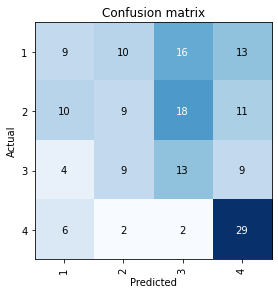

In [347]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [348]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [354]:
pred = learn.predict('pero recibiréis poder, cuando haya venido sobre vosotros el Espíritu Santo, y me seréis testigos en Jerusalén, en toda Judea, en Samaria, y hasta lo último de la tierra. Y habiendo dicho estas cosas, viéndolo ellos, fue alzado, y le recibió una nube que le ocultó de sus ojos.')
print("Probabilities: ", pred[2].tolist())
pred_index = pred[2].tolist().index(max(pred[2]))
print('Text: (Hechos) pero recibiréis poder, cuando haya venido sobre vosotros el Espíritu Santo, y me seréis testigos en Jerusalén, en toda Judea, en Samaria, y hasta lo último de la tierra. Y habiendo dicho estas cosas, viéndolo ellos, fue alzado, y le recibió una nube que le ocultó de sus ojos.')
print("This text was probably taken from: " ,gospels[pred_index])
print('\n')
pred = learn.predict('Decía además: Así es el reino de Dios, como cuando un hombre echa semilla en la tierra; y duerme y se levanta, de noche y de día, y la semilla brota y crece sin que él sepa cómo. Porque de suyo lleva fruto la tierra, primero hierba, luego espiga, después grano lleno en la espiga; y cuando el fruto está maduro, en seguida se mete la hoz, porque la siega ha llegado.')
print("Probabilities: ", pred[2].tolist())
pred_index = pred[2].tolist().index(max(pred[2]))
print('Text: (Marcos) Decía además: Así es el reino de Dios, como cuando un hombre echa semilla en la tierra; y duerme y se levanta, de noche y de día, y la semilla brota y crece sin que él sepa cómo. Porque de suyo lleva fruto la tierra, primero hierba, luego espiga, después grano lleno en la espiga; y cuando el fruto está maduro, en seguida se mete la hoz, porque la siega ha llegado.')
print("This text was probably taken from: " ,gospels[pred_index])
print('\n')
pred = learn.predict('El que dice: Yo le conozco, y no guarda sus mandamientos, el tal es mentiroso, y la verdad no está en él;')
print("Probabilities: ", pred[2].tolist())
pred_index = pred[2].tolist().index(max(pred[2]))
print('Text: (1 de Juan) El que dice: Yo le conozco, y no guarda sus mandamientos, el tal es mentiroso, y la verdad no está en él;')
print("This text was probably taken from: " ,gospels[pred_index])


Probabilities:  [0.17282870411872864, 0.11537151038646698, 0.3769582509994507, 0.3348414897918701]
Text: (Hechos) pero recibiréis poder, cuando haya venido sobre vosotros el Espíritu Santo, y me seréis testigos en Jerusalén, en toda Judea, en Samaria, y hasta lo último de la tierra. Y habiendo dicho estas cosas, viéndolo ellos, fue alzado, y le recibió una nube que le ocultó de sus ojos.
This text was probably taken from:  Lucas


Probabilities:  [0.17227928340435028, 0.37146198749542236, 0.3278094232082367, 0.12844932079315186]
Text: (Marcos) Decía además: Así es el reino de Dios, como cuando un hombre echa semilla en la tierra; y duerme y se levanta, de noche y de día, y la semilla brota y crece sin que él sepa cómo. Porque de suyo lleva fruto la tierra, primero hierba, luego espiga, después grano lleno en la espiga; y cuando el fruto está maduro, en seguida se mete la hoz, porque la siega ha llegado.
This text was probably taken from:  Marcos


Probabilities:  [0.1261557936668396, 0